<img src='images/senales-transito.jpg' style="width:100%;">


En este proyecto, vamos a usar redes neuronales convolucionales para construir, entrenar y testear un modelo de clasificacion de carteles de trafico. Vamos a construir este modelo usando Tensorflow y Keras. este es un problema de clasificacion multiclase. Este modelo puede ser usado en vehiculos autonomos para reconocer los diferentes signos de trafico


In this project, we will use Convolutional Neural Network to build train and test a traffic sign classification model. We will build this model using Tensorflow and Keras. It is a multiclass classification problem. This model can be used in autonomus cars to recognize difertens traffic signs.

Importando las librerias necesiarias.

Importing necesary libraries.

In [1]:
# Importando librerias.

# Importing libraries.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

c:\Users\Ignacio\anaconda3\envs\py3-TF2.0\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Visualizando algunas imagenes de carteles de transito desde el dataset. Podemos ver que las dimensiones de las imagenes no son las mismas.

Visualizing some images of traffic sign from the test dataset. we can see here that the dimension of images are uneven.

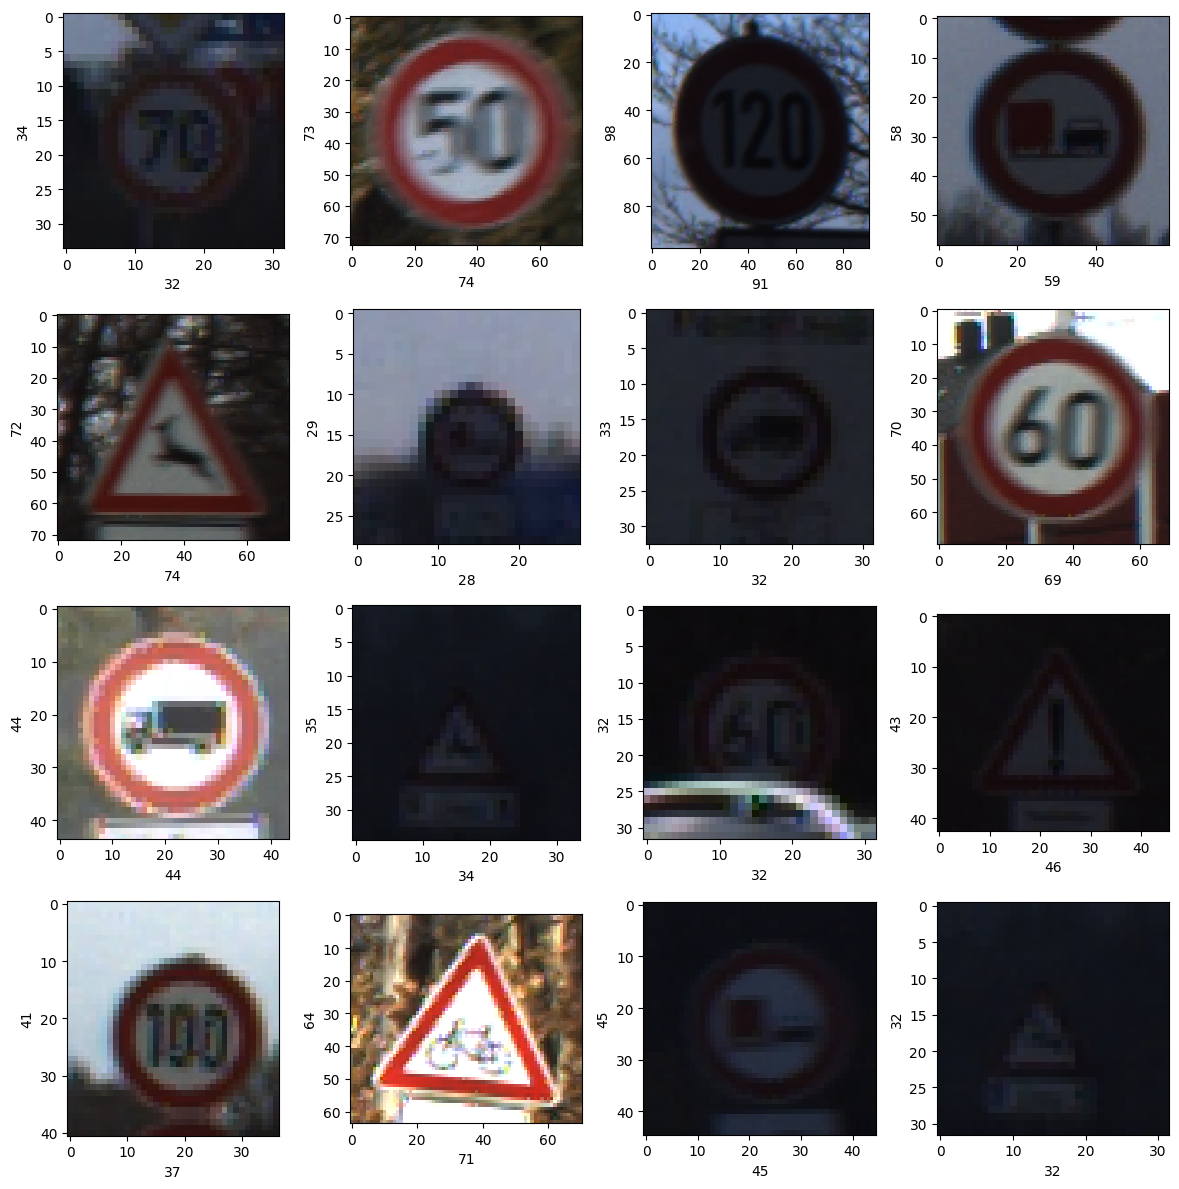

In [2]:
# Imprimeindo 12 imagenes para chequear el dataset.

# Plotting 12 images to check dataset.

plt.figure(figsize=(12,12))
path = "Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # Ancho de la imagen # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # Alto de la imagen # height of image

Para mayor procesamiento vamos a requerir que las imagenes tengan las mismas dimensiones. Entonces, comenzaremos alamcenando las dimendiones de todas las imagenes del datset de "train" desde las 43 clases.


For further processing we will require the images of same dimension. So, we will start storing the dimension of all the images from training dataset from all 43 classes.

In [3]:
# Al tener diferentes tamanos de imagenes, tenemos que hacerlas iguales asi que tomamos el promedio de las dimensiones.

# As size of images are different we have to make them equal so we will take mean of dimanesions.

dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

Ahora hallaremos el valor promedio de ambas dimensiones y las analizamos. Aca podemos ver (50, 50) es la forma promedio para todas las imagenes

Now we will find out the mean value of both the dimensions and analyse them. Here, we can see that (50,50) is the average shape for all the images.

In [4]:
# Imprimiendo el promedio de las dimensiones de las imagenes.

# Printing mean dimension of images.

print("Dimension 1 promedio : ",np.mean(dim1), " Dimension 2 promedio : ",np.mean(dim2))

Dimension 1 promedio :  50.328929582493814  Dimension 2 promedio :  50.83587951745773


Ahora redimensionamos las imagenes a (50,50) y tambien guardamos sus etiquetas de id.

Now we will reshape the images into (50,50) and also store their label ids.

In [5]:
# Ahora redimensionamos las imagenes a (50,50).

# Now we will reshape the images to (50,50.

images = []
label_id = []

for i in range(43):
    labels = 'Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

Convertimos todas las imagenes en un array de numpy y las normalizamos.

Now we will convert all the images into numpy array and normalize them.

In [6]:
# Convirtiendo las imagenes en un array de numpy.

# Converting images into numpy array.

images = np.array(images)

# El rango de pixel de las imagenes esta entre 0 y 255.

# The pixel value of each image ranges between 0 and 255.

# Dividir cada imagen por 255 escalara los valores entre 0 y 1. esto es conocido tambien como normalizacion.

# Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.

images = images/255 

Almacenando las etiquetas id en un array de numpy e imprimiendo su forma. Aca podemos observar que hay 39209 etiquetas id.

Storing the label ids into numpy array and printing the shape. Here we can observe that their are 39209 label ids.

In [7]:
label_id = np.array(label_id)
label_id.shape

(39209,)

Comprobando la forma de las imagenes. Podemos ver que hay 39209 imagenescon una forma de (50,50,3). El "3" significa que es una imagen a color en formato RGB

Checking the shape of the images. Here we can see that their are 39209 images with a shape of (50,50,3.). Number "3" means its an image in RGB format.

In [8]:
images.shape

(39209, 50, 50, 3)

Observaremos las imagenes por clase para chequear que dato esta desbalanceado o no. Por el resultado podemos decir que estan balanceado.

Now we will observe images per class for checking whether the data is balanced or not. From the result we can say that data is balanced.

In [9]:
# Visualizando el numero de clases y su conteo.

# Visualize the number of classes count.

label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

El proximo paso sera dividir los datos en entrenamiento y validacion, con 80% de entrenamientoy 20% de datos de validacion.

The next step would be to split the data into training and validation with 80% of training data and 20% of validation data.

In [10]:
# Dividiendo los datos.

# Splitting the data.

x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

Convirtiendo las clases de las columnas en categoricas, usando la funcion to_categorical().

Converting the classes column into categorical using to_categorical() function.

In [11]:
# Keras tiene una funcion incorporada para one-hot encoding.

# Keras has a built-in function for one-hot encoding.

y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

Definiendo la arquitectura. en esta parte definiremos todas las capas con el input, kernel, tamano, activacion, etc

Defining the model architecture. In this we will define all the layers with their input shape kernel size, activation, etc.

In [12]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax')) # Usando "softmax" por ser un problema de clasifiacion multiple # Using "softmax" for a multiclass classification problem

Compilando el modelo usando metricas, optimizadores y perdidas son requeridos e imprimiendo los resulatdos del modelo

Compiling the model using metrics, optimizer and loss as required and printing out the summary of the model.

In [13]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

Ahora entrenamos el modelo y observamos como va entrenando en cada epoca.

Now we will fit the model and observe how our is getting trained on each epoch.

In [14]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 45s - loss: 2.5874 - accuracy: 0.2962 - val_loss: 1.3552 - val_accuracy: 0.6378 - 45s/epoch - 185ms/step
Epoch 2/10
246/246 - 48s - loss: 1.2356 - accuracy: 0.6134 - val_loss: 0.5174 - val_accuracy: 0.8766 - 48s/epoch - 195ms/step
Epoch 3/10
246/246 - 46s - loss: 0.7947 - accuracy: 0.7433 - val_loss: 0.2986 - val_accuracy: 0.9459 - 46s/epoch - 188ms/step
Epoch 4/10
246/246 - 43s - loss: 0.6134 - accuracy: 0.8039 - val_loss: 0.2193 - val_accuracy: 0.9545 - 43s/epoch - 175ms/step
Epoch 5/10
246/246 - 43s - loss: 0.5267 - accuracy: 0.8285 - val_loss: 0.1610 - val_accuracy: 0.9686 - 43s/epoch - 174ms/step
Epoch 6/10
246/246 - 44s - loss: 0.4563 - accuracy: 0.8512 - val_loss: 0.1347 - val_accuracy: 0.9768 - 44s/epoch - 178ms/step
Epoch 7/10
246/246 - 43s - loss: 0.4065 - accuracy: 0.8657 - val_loss: 0.1329 - val_accuracy: 0.9787 - 43s/epoch - 174ms/step
Epoch 8/10
246/246 - 46s - loss: 0.3617 - accuracy: 0.8828 - val_loss: 0.1058 - val_accuracy: 0.9781 - 46s/epoch - 186

A continuacion vamos a visualizar el accuracy y perdida por epoca. PaRA esto vamos a almacenar el modelo un dataframe de pandas y los graficaremos.

Next we will visualize the accuracy and loss per epoch. For this we will store the model history in the pandas dataframe and plot them.

<AxesSubplot: >

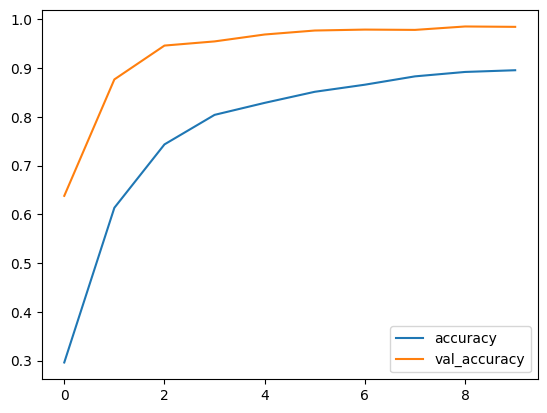

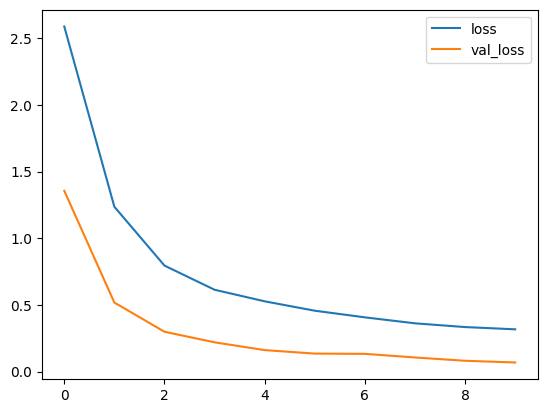

In [15]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

Creación de la variable que contiene la ruta del conjunto de datos de prueba.

Creating the variable which has path of test dataset. As we downloded the dataset we found out that their is a GT-final_test.csv file in the test images folder which cannot be processed. So, we will remove that file.

In [16]:
test_path = 'Test'

El siguiente paso sería crear una función para redimensionar las imágenes de prueba convirtiéndolas en un array numpy y normalizarlas.

Next step would we creating a function to resize the test images converting them into a numpy array and normalize them.

In [17]:
# Definir una función que escalará las imágenes.

# Defining a function that will scale images.

from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    # Convirtiendo las imagenes en un array de numpy.
    
    # Converting images into numpy array.
    
    images = np.array(images)
    
    # El valor del píxel de cada imagen oscila entre 0 y 255.
    # Dividiendo cada imagen por 255 se escalarán los valores entre 0 y 1. Esto también se conoce como normalización.
    
    # The pixel value of each image ranges between 0 and 255.
    # Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    
    images = images/255

    return images

Llamada a la función creada anteriormente en imágenes de prueba.

Calling the above created function on test images.

In [18]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

A continuación leeremos los identificadores de etiqueta de Test.csv y almacenaremos los valores del identificador de clase en la variable y_test.

Next we will read label ids from Test.csv and store the values of the class id in y_test variable.

In [19]:
test = pd.read_csv('Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

Ahora utilizaremos el modelo para hacer predicciones sobre nuestras imágenes de prueba y las guardaremos en y_pred.

Now we will use the model to make predictions on our test images and save them in y_pred.

In [22]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)

395/395 [==============================] - 5s 13ms/step


Almacenamiento de las etiquetas según las clases de imágenes.

Storing the labels according to the image classes.

In [23]:
# Guardando todas las etiquetas.

# Storing all lables.

all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

Veamos las imagenes de test.

Let's visualize test image.

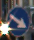

In [53]:
# visualizando la imagen test.

# Visualize test image.

img = Image.open(test_path + '/00019.png')
img

Averiguar la etiqueta original de la imagen.

Finding out original label for the image.

In [54]:
# Etiqueta original.

# Original label.

print("Original label : ",all_lables[y_test[19]])

Original label :  Keep right


Averiguar la etiqueta prevista para la imagen anterior.

Finding out the predicted label for the image.

In [55]:
# Etiqueta de prediccion.

# Predicted label.

print("Predicted label : ",all_lables[y_pred[19]])

Predicted label :  Keep right


## Conclusion:

Empezamos por onservar el conjunto de datos, preprocesarlo, crear el modelo y averiguar las predicciones utilizando el modelo. Durante el preprocesamiento descubrimos que este conjunto de datos tiene 43 clases. El modelo alcanzó una precisión de más del 95% en sólo 10 épocas, podemos optimizar aún más el modelo utilizando el ajuste de hiperparámetros y alcanzar una mayor precisión.

We started with observe the dataset, preprocessing it, created the model and found out the predictions using the model. During preprocessing we found that this dataset has 43 classes. Model reached an accuracy of 95%+ in just 10 epochs, we can further optimize the model using hyper parameter tuning and reach a higher accuracy.

# Alcance:
# Scope:

Este modelo puede utilizarse en coches autónomos, lo que les permitirá reconocer automáticamente las señales de tráfico. Del mismo modo, el sistema de alerta al conductor dentro de los coches ayudará y protegerá a los conductores al comprender las señales de tráfico que les rodean.

This model can be used in self driving cars which will enable them to automatically recognize traffic signs similarly the driver alert system inside cars will help and protect drivers by understanding the traffic signs around them.